In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx


In [2]:
choice = np.random.permutation([i for i in range(1,68)])
choice = sorted (choice[0:25])
print('choosed data:',choice)

choosed data: [2, 3, 6, 10, 11, 14, 17, 19, 23, 25, 27, 28, 29, 31, 33, 34, 36, 45, 46, 48, 53, 56, 62, 64, 66]


In [3]:
image = []
im_train = []
im_test = []
for index in choice:
    temp = ['PIE/'+str(index)+'/'+str(i+1)+'.jpg' for i in range(0,170)]
    number = round(len(temp)*0.7)
    id_train = np.random.permutation([i for i in range(0,len(temp))])
    id_train = sorted(id_train[0:number])
    train = []
    test = []
    for i in range(0,len(temp)):
        if i in id_train:
            train.append(temp[i])
        else:
            test.append(temp[i])
    im_train.extend(train)
    im_test.extend(test)
    image.extend(temp)

print('image size:',len(image))
print('train image size:',len(im_train))
print('test image size:',len(im_test))


image size: 4250
train image size: 2975
test image size: 1275


In [4]:
self = ['own/processed/'+str(i+1)+'.jpg' for i in range (0,10)]
number = round(len(self)*0.7)
a = np.random.permutation([i for i in range(0,len(self))])
a = sorted(a[0:number])
self_train = []
self_test = []
for i in range(0,len(self)):
    if i in a:
        self_train.append(self[i])
    else:
        self_test.append(self[i])
print('self image size:',len(self))
print('self train image size:',len(self_train))
print('self test image size:',len(self_test))


self image size: 10
self train image size: 7
self test image size: 3


In [5]:
label = []
train_set = []

whole_train = im_train+self_train
for i in range(len(whole_train)):
    path = whole_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    train_set.append(image)
    
    if path2[0]=='PIE':
        label.append(path2[1])
    elif path2[0]=='own':
        label.append(path2[0])
train_set = np.array(train_set)
train_set = train_set.reshape(len(train_set), -1)
label = np.array(label)

test_label = []
test_set = []

whole_test = im_test+self_test
for i in range(len(whole_test)):
    path = whole_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    test_set.append(image)
    
    if path2[0]=='PIE':
        test_label.append(path2[1])
    elif path2[0]=='own':
        test_label.append(path2[0])
test_set = np.array(test_set)
test_set = test_set.reshape(len(test_set), -1)
test_label = np.array(test_label)

print(train_set.shape)
print(test_set.shape)
print(label.shape)
print(test_label.shape)

(2982, 1024)
(1278, 1024)
(2982,)
(1278,)


In [6]:
own_train = []
own_label = []
for i in range(len(self_train)):
    path = self_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_train.append(image)
    
    if path2[0]=='PIE':
        own_label.append(path2[1])
    elif path2[0]=='own':
        own_label.append(path2[0])
own_train = np.array(own_train).reshape(len(own_train), -1)
own_label = np.array(own_label)

own_test = []
own_labeltest = []
for i in range(len(self_test)):
    path = self_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_test.append(image)
    
    if path2[0]=='PIE':
        own_labeltest.append(path2[1])
    elif path2[0]=='own':
        own_labeltest.append(path2[0])
own_test = np.array(own_test).reshape(len(own_test), -1)
own_labeltest = np.array(own_labeltest)

print(own_train.shape)
print(own_test.shape)
print(own_label.shape)
print(own_labeltest.shape)

(7, 1024)
(3, 1024)
(7,)
(3,)


In [19]:
def custom_LDA(data, label, num_components):
    unique_labels = np.unique(label)
    num_classes = len(unique_labels)
    num_features = data.shape[1]

    class_means = np.zeros((num_classes, num_features))
    within_class_scatter = np.zeros((num_features, num_features))
    class_sizes = []

    for i, class_label in enumerate(unique_labels):
        class_data = data[label == class_label]  # Adjusted this line
        class_sizes.append(len(class_data))

        class_means[i] = np.mean(class_data, axis=0)

        centered_data = class_data - class_means[i]
        within_class_scatter += np.dot(centered_data.T, centered_data)

    total_mean = np.mean(data, axis=0)

    between_class_scatter = np.zeros((num_features, num_features))
    for i in range(num_classes):
        class_mean_diff = class_means[i] - total_mean
        between_class_scatter += class_sizes[i] * np.outer(class_mean_diff, class_mean_diff)

    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))

    sort_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sort_indices][:num_components]
    eigenvectors = eigenvectors[:, sort_indices][:, :num_components]

    return eigenvalues, eigenvectors

In [20]:
value2, vector2 = custom_LDA(train_set,label,2)
p2 = np.dot(train_set, vector2)

In [21]:
print(p2.shape)

(2982, 2)


In [23]:
p_self2 = p2[2975:2982,:]
print(p_self2.shape)

(7, 2)


In [24]:
p_pie2 = p2[0:2975,:]
p_choice2 = np.random.permutation([i for i in range(0,2975)])
p_choice2 = sorted (p_choice2[0:500])
p_choice2 = p_pie2[p_choice2,:]
print(p_choice2.shape)

(500, 2)


/Users/yiming/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


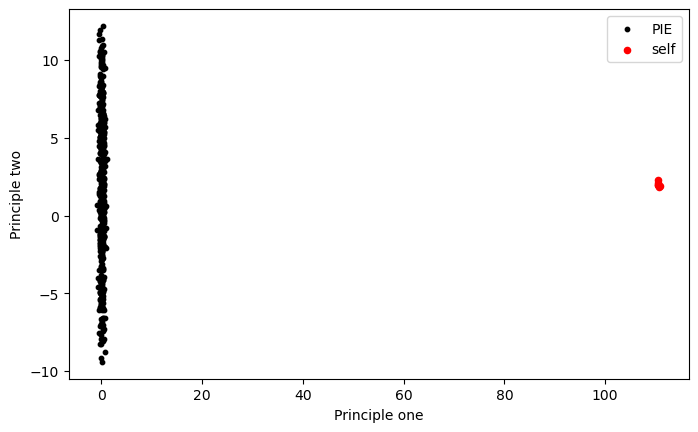

In [25]:
fig = plt.figure(figsize=plt.figaspect(0.6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(p_choice2[0:500, 0], p_choice2[0:500, 1], s = 10, c = 'black', label='PIE')
ax.scatter(p_self2[0:7, 0], p_self2[0:7, 1], s = 20, c = 'red', label='self')
ax.set_xlabel('Principle one')
ax.set_ylabel('Principle two')
ax.legend()
plt.show()

In [26]:
value3, vector3 = custom_LDA(train_set,label,3)
p3 = np.dot(train_set, vector3)

In [27]:
print(p3.shape)

(2982, 3)


In [28]:
p_self3 = p3[2975:2982,:]
print(p_self3.shape)

(7, 3)


In [29]:
p_pie3 = p3[0:2975,:]
p_choice3 = np.random.permutation([i for i in range(0,2975)])
p_choice3 = sorted (p_choice3[0:500])
p_choice3 = p_pie3[p_choice3,:]
print(p_choice3.shape)

(500, 3)


/Users/yiming/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/yiming/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
/Users/yiming/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
/Users/yiming/anaconda3/lib/python3.11/site-packages/matplotlib/colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


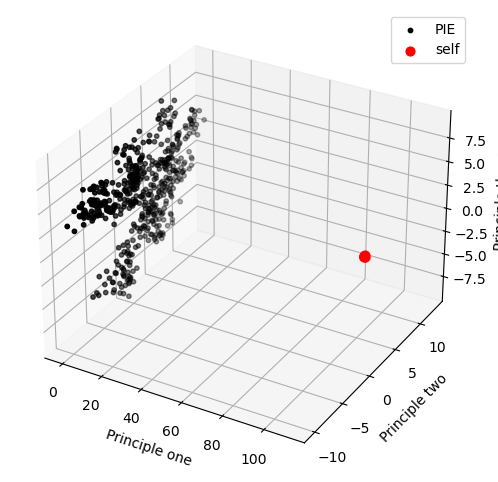

In [30]:
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(p_choice3[0:500, 0], p_choice3[0:500, 1], p_choice3[0:500, 2], s = 10, c = 'black', label='PIE')
ax.scatter(p_self3[0:7, 0], p_self3[0:7, 1], p_self3[0:7, 2], s = 40, c = 'red', label='self')
ax.set_xlabel('Principle one')
ax.set_ylabel('Principle two')
ax.set_zlabel('Principle three')
ax.legend()
plt.show()

In [33]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        sorted_indices = np.argsort(distances)
        k_nearest_neighbors = [y_train[i] for i in sorted_indices[:k]]
        y_pred.append(max(set(k_nearest_neighbors), key=k_nearest_neighbors.count))
    
    return np.array(y_pred)


def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# use PIE image

In [36]:
value2, vector2 = custom_LDA(train_set,label,2)
p2 = np.dot(train_set, vector2)
t2 = np.dot(test_set, vector2)
y_pred = knn(p2, label, t2, 3)
acc = accuracy(test_label, y_pred)
print(f"Accuracy (2d): {acc*100:.2f}%")

Accuracy (2d): 18.15%


In [37]:
value3, vector3 = custom_LDA(train_set,label,3)
p3 = np.dot(train_set, vector3)
t3 = np.dot(test_set, vector3)
y_pred = knn(p3, label, t3, 3)
acc = accuracy(test_label, y_pred)
print(f"Accuracy (3d): {acc*100:.2f}%")

Accuracy (3d): 43.51%


In [38]:
value9, vector9 = custom_LDA(train_set,label,9)
p9 = np.dot(train_set, vector9)
t9 = np.dot(test_set, vector9)
y_pred = knn(p9, label, t9, 3)
acc = accuracy(test_label, y_pred)
print(f"Accuracy (9d): {acc*100:.2f}%")

Accuracy (9d): 91.78%


# use own image

In [40]:
value2, vector2 = custom_LDA(own_train,own_label,2)
p2 = np.dot(own_train, vector2)
t2 = np.dot(own_test, vector2)
y_pred = knn(p2, own_label, t2, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy (2d): {acc*100:.2f}%")

Accuracy (2d): 100.00%


In [41]:
value3, vector3 = custom_LDA(own_train,own_label,3)
p3 = np.dot(own_train, vector3)
t3 = np.dot(own_test, vector3)
y_pred = knn(p3, own_label, t3, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy (3d): {acc*100:.2f}%")

Accuracy (3d): 100.00%


In [42]:
value9, vector9 = custom_LDA(own_train,own_label,9)
p9 = np.dot(own_train, vector9)
t9 = np.dot(own_test, vector9)
y_pred = knn(p9, own_label, t9, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy (9d): {acc*100:.2f}%")

Accuracy (9d): 100.00%
